In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

states = pd.read_csv('data/states_all.csv')
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [7]:
states['GRADES_4_G']

0        57948.0
1         9748.0
2        55433.0
3        34632.0
4       418418.0
          ...   
1710         NaN
1711         NaN
1712         NaN
1713         NaN
1714         NaN
Name: GRADES_4_G, Length: 1715, dtype: float64

## Create a variable that contains the weighted average of the grades in the dataset. The number of students in the fourth grade is different from that of the eighth grade. So you will need a weighted average!

In [29]:
states_sorted=states.sort_values('YEAR')
new_states=states_sorted.interpolate(interplace=True)

In [30]:
new_states["AVG_MATH"]=(new_states["GRADES_4_G"]*new_states["AVG_MATH_4_SCORE"]+new_states["GRADES_8_G"]*new_states["AVG_MATH_8_SCORE"])/(new_states["GRADES_4_G"]+new_states["GRADES_8_G"])
new_states["AVG_READING"]=(new_states["GRADES_4_G"]*new_states["AVG_READING_4_SCORE"]+new_states["GRADES_8_G"]*new_states["AVG_READING_8_SCORE"])/(new_states["GRADES_4_G"]+new_states["GRADES_8_G"])

print('Math',new_states["AVG_MATH"])
print('AVG_READING',new_states["AVG_READING"])
new_states.isnull().sum()*100/new_states.count()

Math 1275           NaN
1527           NaN
1520           NaN
1513           NaN
1324           NaN
           ...    
1683    258.824273
1684    269.725386
1685    257.274830
1687    256.956122
1714    265.340754
Name: AVG_MATH, Length: 1715, dtype: float64
AVG_READING 1275           NaN
1527           NaN
1520           NaN
1513           NaN
1324           NaN
           ...    
1683    241.274830
1684    251.307792
1685    239.758348
1687    236.890198
1714    245.373716
Name: AVG_READING, Length: 1715, dtype: float64


PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          26.661743
TOTAL_REVENUE                   22.064057
FEDERAL_REVENUE                 22.064057
STATE_REVENUE                   22.064057
LOCAL_REVENUE                   22.064057
TOTAL_EXPENDITURE               22.064057
INSTRUCTION_EXPENDITURE         22.064057
SUPPORT_SERVICES_EXPENDITURE    22.064057
OTHER_EXPENDITURE               26.661743
CAPITAL_OUTLAY_EXPENDITURE      22.064057
GRADES_PK_G                      0.058343
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                    49.650960
GRADES_9_12_G                   49.650960
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                15.255376
AVG_MATH_8_SCORE                13.500993
AVG_READING_4_SCORE             21

## What is the correlation between the variable you just created and the types of expenditures? Which expenditure item has more correlation than others?

In [31]:
new_states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_MATH,AVG_READING
1275,1986_ALABAMA,ALABAMA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45396.0,NaN,NaN,733735.0,NaN,NaN,NaN,NaN,NaN,NaN
1527,1986_OKLAHOMA,OKLAHOMA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38606.0,NaN,NaN,593183.0,NaN,NaN,NaN,NaN,NaN,NaN
1520,1986_OHIO,OHIO,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,132962.0,NaN,NaN,1793508.0,NaN,NaN,NaN,NaN,NaN,NaN
1513,1986_NORTH_DAKOTA,NORTH_DAKOTA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8204.0,NaN,NaN,118703.0,NaN,NaN,NaN,NaN,NaN,NaN
1324,1986_DELAWARE,DELAWARE,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6621.0,NaN,NaN,94410.0,NaN,NaN,NaN,NaN,NaN,NaN


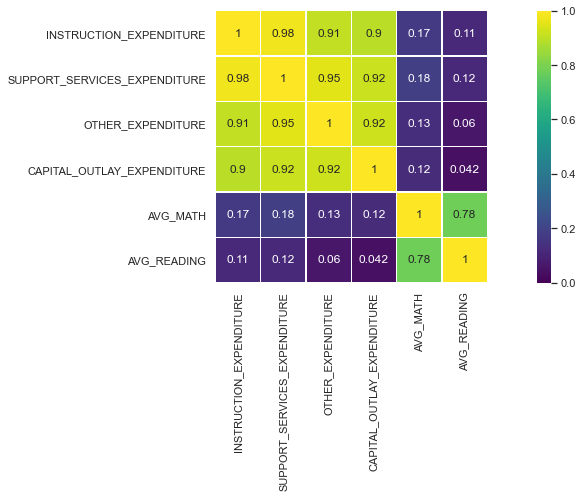

In [53]:
new_df=new_states.iloc[:,9:13]
states_corr=pd.concat([new_df,new_states.AVG_MATH,new_states.AVG_READING],axis=1,join='inner')

plt.figure(figsize=(18,5))
sns.heatmap(states_corr.corr(),square=True,annot=True,linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.show()

## Now apply the Principal Components Analysis (PCA) for the four expenditure items! How much of the total variance can be explained by the first component?

In [47]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine

In [57]:
new_df = new_df.dropna(axis='columns',how='all') 
pca = PCA(n_components=4)
pca.fit(new_df)
components = pca.transform(new_df)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(components.T[0])

[9.85669376e-01 9.81571903e-03 4.17810870e-03 3.36796034e-04]
1.0
[ 1159238.52762369 -5097101.43953711 -2002536.4707832  ...
 -2203652.10226543 -2203652.10226543 -2203652.10226543]
